In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns
import scipy.stats as st

path = 'data/ant/ant_2025_02_15_11_35_40_0000--s-0/progress.csv'
file = pandas.read_csv(path)

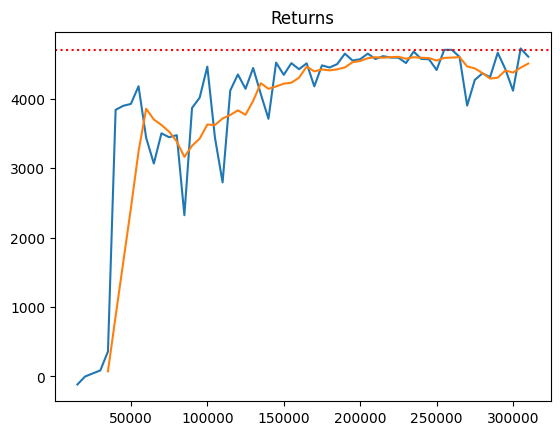

In [2]:
returns = file['evaluation/Returns Mean']
ma_returns = file['evaluation/Returns Mean'].rolling(window=5).mean()
steps = (file['Epoch'] + 3) * 5000

plt.plot(steps, returns)
plt.plot(steps, ma_returns)
plt.axhline(4700, color='r', ls=':')
plt.title("Returns")
# plt.savefig('temp')
plt.show()

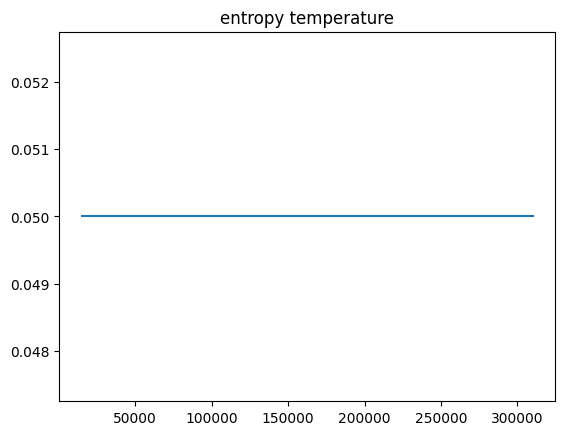

In [3]:
alpha = file['trainer/Alpha']
plt.plot(steps, alpha)
plt.title('entropy temperature')
plt.show()

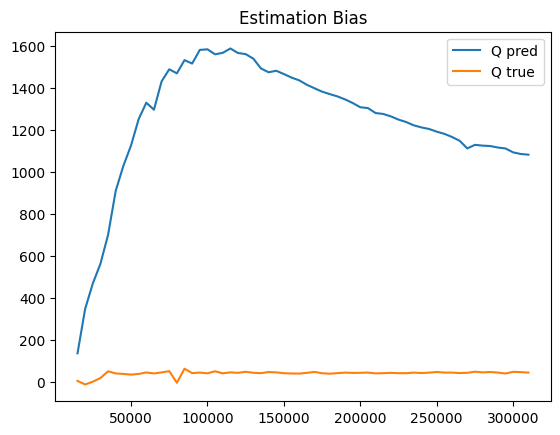

In [4]:
bias = file['evaluation/Estimation Bias Mean']
q_pred = file['evaluation/EB/Q_Pred Mean']
q_true = file['evaluation/EB/Q_True Mean']

plt.plot(steps, q_pred, label='Q pred')
plt.plot(steps, q_true, label='Q true')
plt.legend()
plt.title("Estimation Bias")
# plt.savefig('temp1')
plt.show()

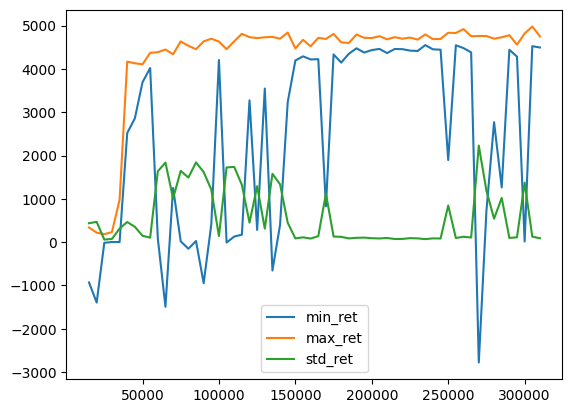

In [5]:
min_ret = file['evaluation/Returns Min']
max_ret = file['evaluation/Returns Max']
std_ret = file['evaluation/Returns Std']

plt.plot(steps, min_ret, label='min_ret')
plt.plot(steps, max_ret, label='max_ret')
plt.plot(steps, std_ret, label='std_ret')
plt.legend()
# plt.savefig('temp', pad_inches=0)
plt.show()

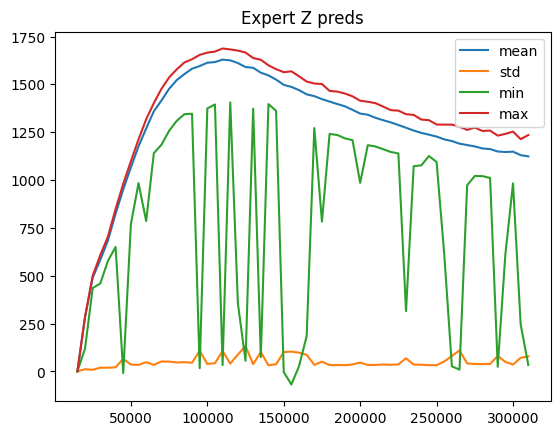

In [6]:
mean = file['trainer/Z Expert Predictions Mean']
std = file['trainer/Z Expert Predictions Std']
min = file['trainer/Z Expert Predictions Min']
max = file['trainer/Z Expert Predictions Max']

plt.plot(steps, mean, label='mean')
plt.plot(steps, std, label='std')
plt.plot(steps, min, label='min')
plt.plot(steps, max, label='max')
plt.legend()
plt.title('Expert Z preds')
# plt.savefig('temp', pad_inches=0)
plt.show()

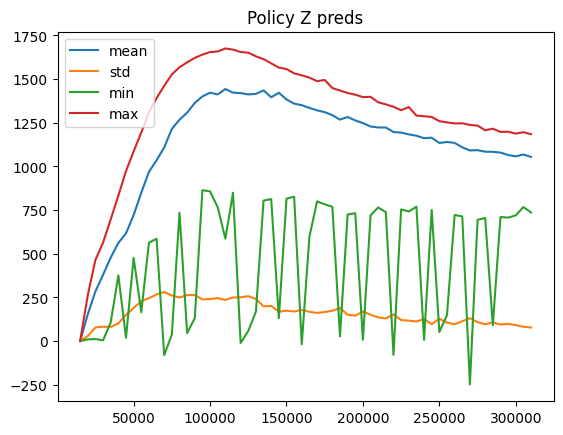

In [7]:
mean = file['trainer/Z Policy Predictions Mean']
std = file['trainer/Z Policy Predictions Std']
min = file['trainer/Z Policy Predictions Min']
max = file['trainer/Z Policy Predictions Max']

plt.plot(steps, mean, label='mean')
plt.plot(steps, std, label='std')
plt.plot(steps, min, label='min')
plt.plot(steps, max, label='max')
plt.legend()
plt.title('Policy Z preds')
# plt.savefig('temp', pad_inches=0)
plt.show()

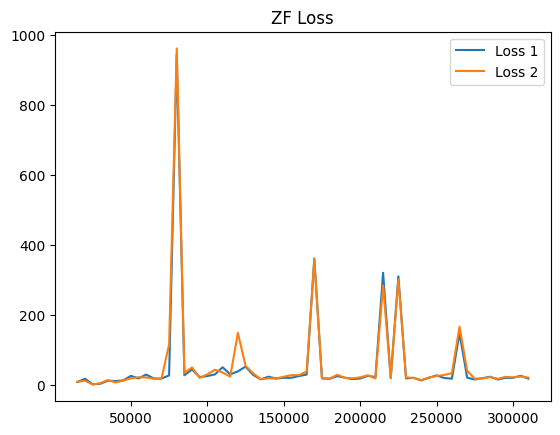

In [8]:
loss1 = file['trainer/ZF1 Loss']
loss2 = file['trainer/ZF2 Loss']

plt.plot(steps, loss1, label='Loss 1')
plt.plot(steps, loss2, label='Loss 2')
plt.legend()
plt.title('ZF Loss')
plt.show()

9.029511999999963


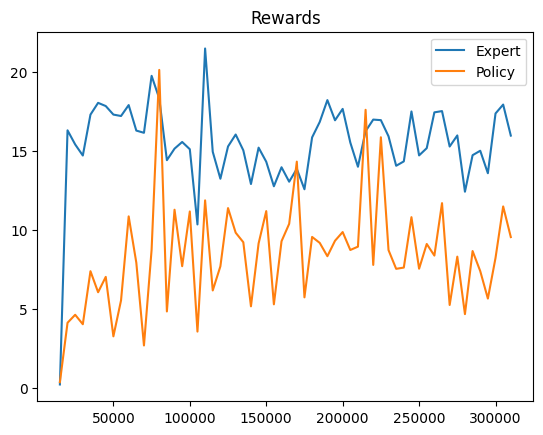

In [9]:
expert_reward = file['trainer/Z Expert Predictions Mean'] - file['trainer/Z Expert Targets Mean']
policy_reward = file['trainer/Z Policy Predictions Mean'] - file['trainer/Z Policy Targets Mean']

print(policy_reward.values[-50:].mean())

plt.plot(steps, expert_reward, label='Expert')
plt.plot(steps, policy_reward, label='Policy')
plt.legend()
plt.title('Rewards')
plt.show()

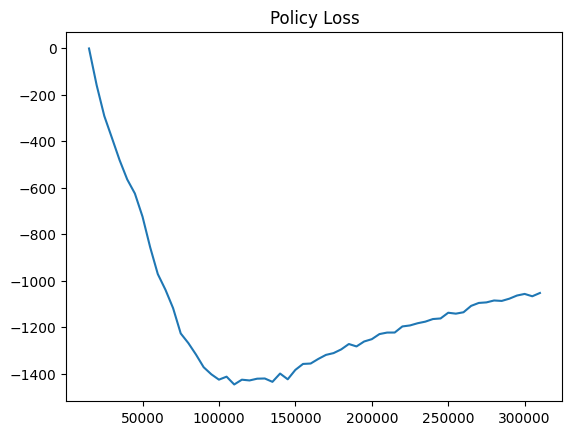

In [10]:
policy_loss = file['trainer/Policy Loss']

plt.plot(steps, policy_loss)
plt.title('Policy Loss')
plt.show()

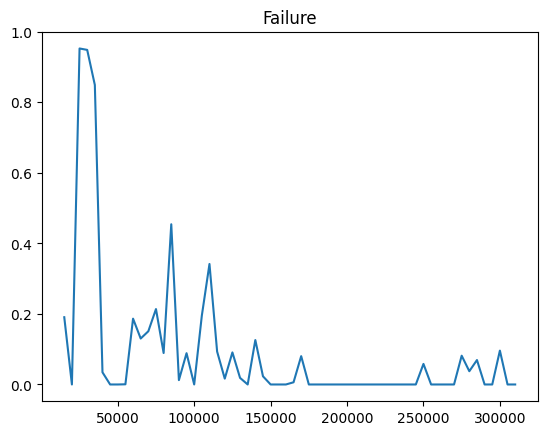

In [11]:
path_l_mean = file['evaluation/path length Mean']
path_l_std = file['evaluation/path length Std']
path_l_min = file['evaluation/path length Min']
path_l_max = file['evaluation/path length Max']

failure = (1000. - path_l_mean) / 1000.
plt.plot(steps, failure)
plt.title('Failure')
plt.show()

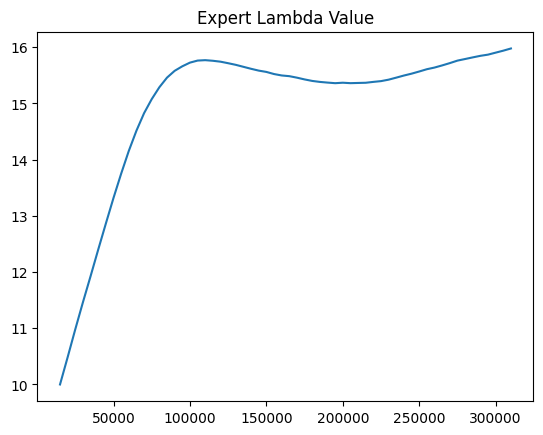

In [12]:
bias_value = file['trainer/expert_lambda Value']

plt.plot(steps, bias_value)
plt.title('Expert Lambda Value')
plt.show()

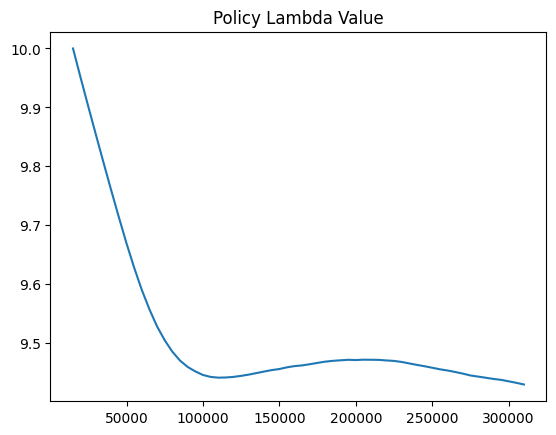

In [13]:
bias_value = file['trainer/policy_lambda Value']

plt.plot(steps, bias_value)
plt.title('Policy Lambda Value')
plt.show()

% 51.7


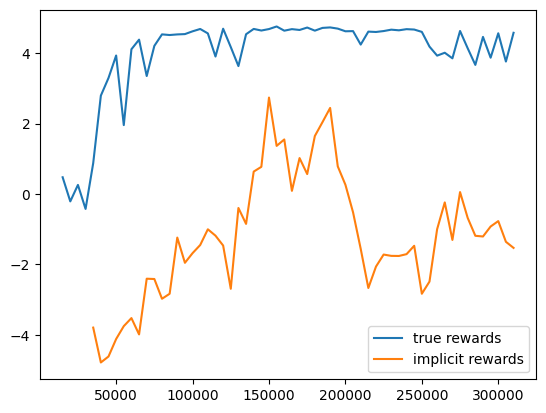

In [31]:
# Correlation
true_r = file["evaluation/Rewards Mean"]
implicit_r = file["trainer/ZF Policy Reward"].rolling(5).mean()
cor = true_r.corr(implicit_r, method='pearson')
print(f"% {cor * 100:.1f}")

plt.plot(steps, true_r, label='true rewards')
plt.plot(steps, implicit_r, label='implicit rewards')
plt.legend()
plt.show()

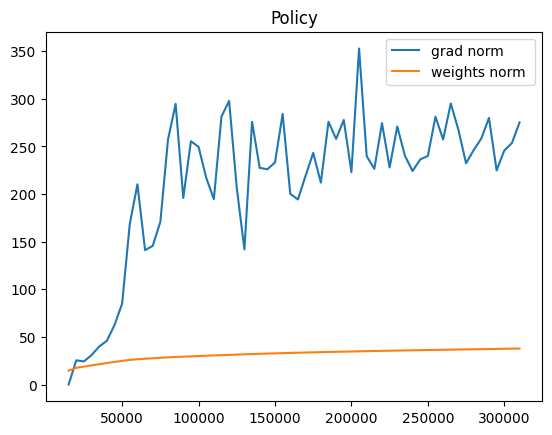

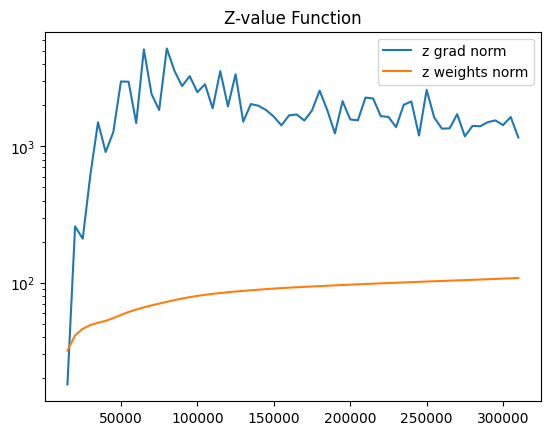

In [32]:
p_grad = file['trainer/Policy Grad Norm']
z1_grad = file['trainer/Zf1 Grad Norm']
z2_grad = file['trainer/Zf2 Grad Norm']

p_param = file['trainer/Policy Param Norm']
z1_param = file['trainer/Zf1 Param Norm']
z2_param = file['trainer/Zf2 Param Norm']

z_grad = (z1_grad + z2_grad) / 2.
z_param = (z1_param + z2_param) / 2.

plt.plot(steps, p_grad, label='grad norm')
plt.plot(steps, p_param, label='weights norm ')
plt.legend()
plt.title('Policy')
plt.show()

plt.plot(steps, z_grad, label='z grad norm')
plt.plot(steps, z_param, label='z weights norm')
plt.yscale('log')
plt.legend()
plt.title('Z-value Function')
plt.show()